# 獲取幣安數據

In [10]:
import get_data

# 定义需要下载的数据
symbol = "AVAXUSDT"          # 币种符号
interval = "1d"             # 时间间隔
start_date = "2022-05-12"   # 起始日期
end_date = "2024-12-04"     # 结束日期
data_type = "spot"          # 数据类型：现货 (spot) 或 合约 (futures)
data_folder = "data"        # 数据存储文件夹

# 调用下载函数
get_data.fetch_and_process_binance_data(
    symbol=symbol, 
    interval=interval, 
    start_date=start_date, 
    end_date=end_date, 
    data_type=data_type, 
    data_folder=data_folder
)

Downloaded: AVAXUSDT-1d-2022-05-12.zip
Unzipped: downloads/AVAXUSDT-1d-2022-05-12.zip
Deleted zip file: downloads/AVAXUSDT-1d-2022-05-12.zip
Downloaded: AVAXUSDT-1d-2022-05-13.zip
Unzipped: downloads/AVAXUSDT-1d-2022-05-13.zip
Deleted zip file: downloads/AVAXUSDT-1d-2022-05-13.zip
Downloaded: AVAXUSDT-1d-2022-05-14.zip
Unzipped: downloads/AVAXUSDT-1d-2022-05-14.zip
Deleted zip file: downloads/AVAXUSDT-1d-2022-05-14.zip
Downloaded: AVAXUSDT-1d-2022-05-15.zip
Unzipped: downloads/AVAXUSDT-1d-2022-05-15.zip
Deleted zip file: downloads/AVAXUSDT-1d-2022-05-15.zip
Downloaded: AVAXUSDT-1d-2022-05-16.zip
Unzipped: downloads/AVAXUSDT-1d-2022-05-16.zip
Deleted zip file: downloads/AVAXUSDT-1d-2022-05-16.zip
Downloaded: AVAXUSDT-1d-2022-05-17.zip
Unzipped: downloads/AVAXUSDT-1d-2022-05-17.zip
Deleted zip file: downloads/AVAXUSDT-1d-2022-05-17.zip
Downloaded: AVAXUSDT-1d-2022-05-18.zip
Unzipped: downloads/AVAXUSDT-1d-2022-05-18.zip
Deleted zip file: downloads/AVAXUSDT-1d-2022-05-18.zip
Downloaded: A

# BTC&Stables overview

## 讀取&處理數據

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取穩定幣數據
stablecoin_data = pd.read_csv("data/Stables/stablecoins.csv")  # 替換為實際文件路徑
stablecoin_data["Date"] = pd.to_datetime(stablecoin_data["Timestamp"], unit="s")

# 讀取 BTC 價格數據（假設已保存為 HDF5 格式）
btc_data = pd.read_hdf("data/BTCUSDT/spot/1d/BTCUSDT_1d_data.h5", key="prices")
btc_data["Date"] = pd.to_datetime(btc_data["timestamp_start"])

# 確保只保留需要的列
btc_data = btc_data[["Date", "close"]]

# 合併數據，保留穩定幣所有列
merged_data = pd.merge(btc_data, stablecoin_data, on="Date", how="inner")

# 查看合併後的數據
print("Merged Data Sample:")
print(merged_data.head())

Merged Data Sample:
        Date     close   Timestamp          USDT          USDC          USTC  \
0 2021-03-31  58740.55  1617148800  4.072640e+10  1.091108e+10  1.606224e+09   
1 2021-04-01  58720.44  1617235200  4.082866e+10  1.081464e+10  1.620057e+09   
2 2021-04-02  58950.01  1617321600  4.086523e+10  1.087159e+10  1.647230e+09   
3 2021-04-03  57051.94  1617408000  4.181313e+10  1.090838e+10  1.663062e+09   
4 2021-04-04  58202.01  1617494400  4.247584e+10  1.076522e+10  1.673207e+09   

           BUSD           DAI         FRAX         TUSD  ...  MOD   M  \
0  3.583389e+09  3.015418e+09  111237391.0  329557201.0  ...  NaN NaN   
1  3.481946e+09  3.009058e+09  112575560.0  327833466.0  ...  NaN NaN   
2  3.527311e+09  2.965694e+09  112227186.0  321731879.0  ...  NaN NaN   
3  3.826085e+09  3.041816e+09  117026314.0  328819864.0  ...  NaN NaN   
4  3.955678e+09  3.059450e+09  112935608.0  315285600.0  ...  NaN NaN   

   USDX Money USDX  Moneta  sUSD  Reservoir Stablecoin  satU

## 可視化分析

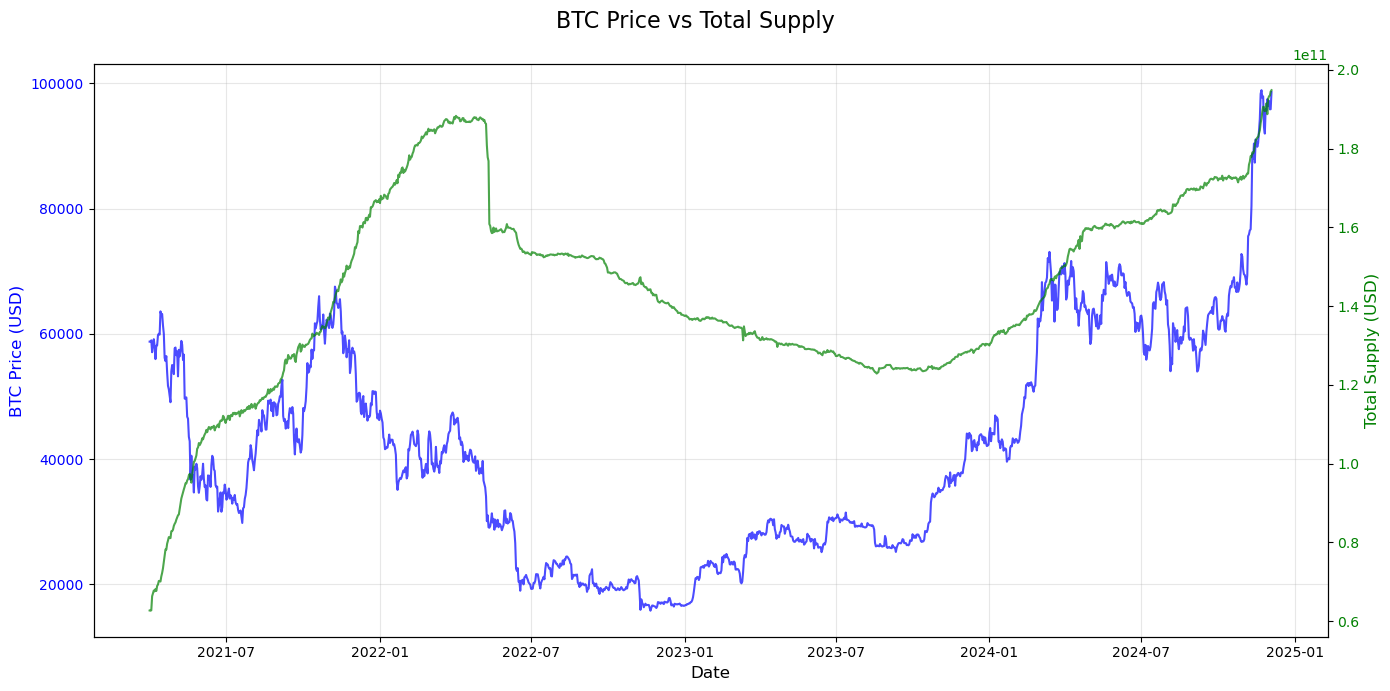

In [16]:
# 選擇穩定幣列（例如 Total）
stablecoin = "Total"

# 創建畫布
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：BTC 價格
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("BTC Price (USD)", fontsize=12, color="blue")
ax1.plot(merged_data["Date"], merged_data["close"], label="BTC Price", color="blue", alpha=0.7)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(alpha=0.3)

# 右側 Y 軸：穩定幣供應量
ax2 = ax1.twinx()
ax2.set_ylabel(f"{stablecoin} Supply (USD)", fontsize=12, color="green")
ax2.plot(merged_data["Date"], merged_data[stablecoin], label=f"{stablecoin} Supply", color="green", alpha=0.7)
ax2.tick_params(axis="y", labelcolor="green")

# 添加標題和圖例
fig.suptitle(f"BTC Price vs {stablecoin} Supply", fontsize=16)
fig.tight_layout()
plt.show()

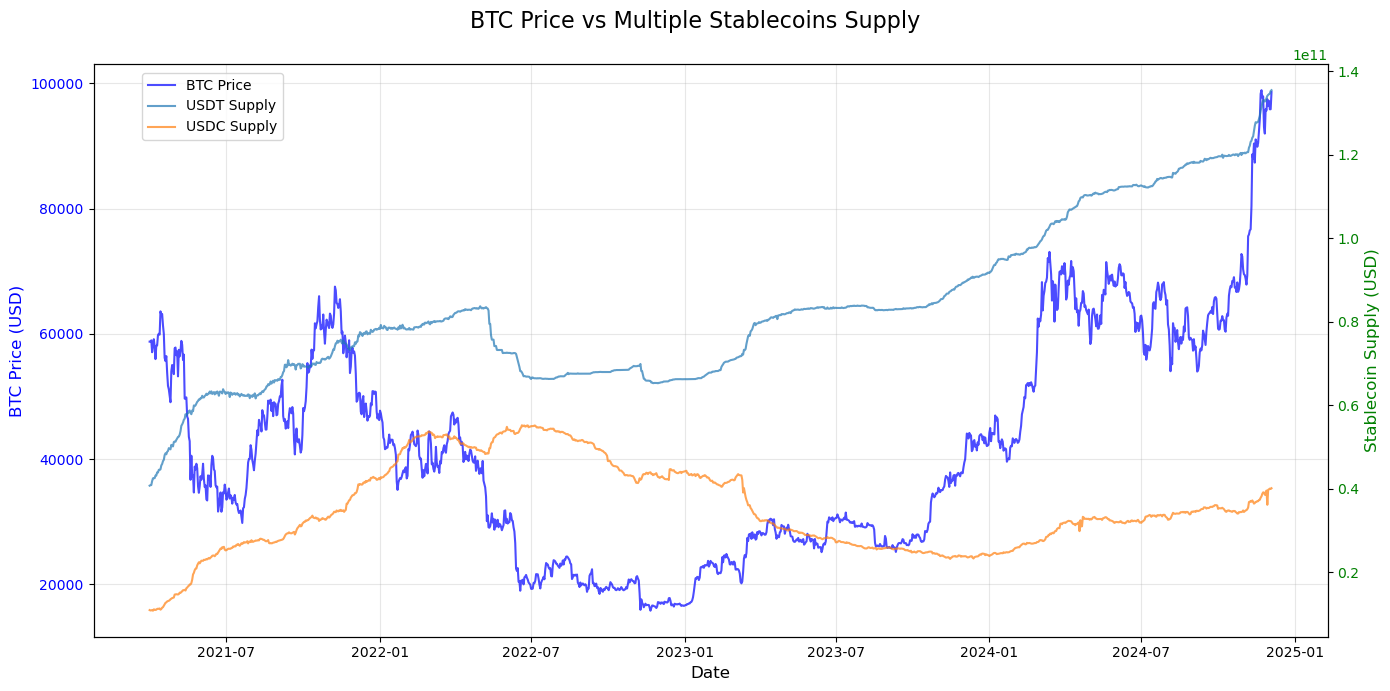

In [36]:
# 選擇多個穩定幣列
stablecoins = ["USDT", "USDC"]

# 創建畫布
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：BTC 價格
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("BTC Price (USD)", fontsize=12, color="blue")
ax1.plot(merged_data["Date"], merged_data["close"], label="BTC Price", color="blue", alpha=0.7)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(alpha=0.3)

# 右側 Y 軸：多個穩定幣供應量
ax2 = ax1.twinx()
ax2.set_ylabel("Stablecoin Supply (USD)", fontsize=12, color="green")

# 繪製每個穩定幣的供應量
for stablecoin in stablecoins:
    ax2.plot(merged_data["Date"], merged_data[stablecoin], label=f"{stablecoin} Supply", alpha=0.7)

ax2.tick_params(axis="y", labelcolor="green")

# 添加標題和圖例
fig.suptitle("BTC Price vs Multiple Stablecoins Supply", fontsize=16)
fig.tight_layout()

# 添加圖例
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=10)
plt.show()

1.	穩定幣市場份額比例：
•	每個穩定幣的發行量占穩定幣總量的比例：

	$\text{Ratio}{i} = \frac{\text{Stablecoin Issuance}{i}}{\text{Total Stablecoin Supply}}$

2.	穩定幣變化率：
•	每個穩定幣的發行量環比變化率：

	$\text{Change Rate}{i} = \frac{\text{Stablecoin Issuance}{i}(t) - \text{Stablecoin Issuance}{i}(t-1)}{\text{Stablecoin Issuance}{i}(t-1)}$


In [73]:
import pandas as pd
n = 10

# 讀取穩定幣數據
stablecoin_data = pd.read_csv("data/Stables/stablecoins.csv")

# 提取穩定幣相關的列（假設從第 2 列開始是穩定幣數據，排除 Timestamp、Date 和 Total）
stablecoin_columns = stablecoin_data.columns[2:-1]  # 排除 Total

# 獲取最後一行穩定幣數據
last_row = stablecoin_data.iloc[-1][stablecoin_columns]

# 按數量排序，選擇數量最高的前 n 個穩定幣
top_n_stablecoins = last_row.sort_values(ascending=False).head(n).index.tolist()

# 只保留前 n 個穩定幣以及必要的列
filtered_stablecoin_data = stablecoin_data[["Timestamp", "Date", "Total"] + top_n_stablecoins]


In [74]:
# 查看數據結構
print("Filtered stablecoin data columns:")
print(filtered_stablecoin_data.columns)

Filtered stablecoin data columns:
Index(['Timestamp', 'Date', 'Total', 'USDT', 'USDC', 'USDe', 'DAI', 'FDUSD',
       'Sky Dollar', 'USDD', 'BUIDL', 'USD0', 'PYUSD'],
      dtype='object')


In [75]:
# 計算市場份額比例
ratios = {f"{col}_Ratio": filtered_stablecoin_data[col] / filtered_stablecoin_data["Total"] for col in top_n_stablecoins}

# 計算穩定幣的環比變化率
changes = {f"{col}_Change": filtered_stablecoin_data[col].pct_change() for col in top_n_stablecoins}

# 計算 Total 的環比變化率
total_change = filtered_stablecoin_data["Total"].pct_change()
changes["Total_Change"] = total_change  # 將 Total 的變化率添加到變化率字典

# 使用 pd.concat 一次性添加所有新列
ratio_df = pd.DataFrame(ratios)
change_df = pd.DataFrame(changes)

# 合併數據
filtered_stablecoin_data = pd.concat([filtered_stablecoin_data, ratio_df, change_df], axis=1)

# 查看處理後的數據
print("Processed Data Sample:")
print(filtered_stablecoin_data.head())

Processed Data Sample:
    Timestamp        Date         Total          USDT          USDC  USDe  \
0  1617148800  2021-03-31  6.270887e+10  4.072640e+10  1.091108e+10   NaN   
1  1617235200  2021-04-01  6.265331e+10  4.082866e+10  1.081464e+10   NaN   
2  1617321600  2021-04-02  6.275346e+10  4.086523e+10  1.087159e+10   NaN   
3  1617408000  2021-04-03  6.632674e+10  4.181313e+10  1.090838e+10   NaN   
4  1617494400  2021-04-04  6.700625e+10  4.247584e+10  1.076522e+10   NaN   

            DAI  FDUSD  Sky Dollar  USDD  ...  USDC_Change  USDe_Change  \
0  3.015418e+09    NaN         NaN   NaN  ...          NaN          NaN   
1  3.009058e+09    NaN         NaN   NaN  ...    -0.008839          NaN   
2  2.965694e+09    NaN         NaN   NaN  ...     0.005266          NaN   
3  3.041816e+09    NaN         NaN   NaN  ...     0.003384          NaN   
4  3.059450e+09    NaN         NaN   NaN  ...    -0.013124          NaN   

   DAI_Change  FDUSD_Change  Sky Dollar_Change  USDD_Change  BU

In [77]:
# 查看處理後的數據
print("Processed stablecoin data sample:")
print(filtered_stablecoin_data["Total_Change"].head())

Processed stablecoin data sample:
0         NaN
1   -0.000886
2    0.001598
3    0.056942
4    0.010245
Name: Total_Change, dtype: float64


## 計算相關性

In [78]:
# 讀取比特幣價格數據
btc_data = pd.read_hdf("data/BTCUSDT/spot/1d/BTCUSDT_1d_data.h5", key="prices")
btc_data["Date"] = pd.to_datetime(btc_data["timestamp_start"])
btc_data = btc_data[["Date", "close"]]  # 僅保留 Date 和 close 列

# 合併比特幣和穩定幣數據
filtered_stablecoin_data["Date"] = pd.to_datetime(filtered_stablecoin_data["Date"])
merged_data = pd.merge(btc_data, filtered_stablecoin_data, on="Date", how="inner")

In [79]:
# 查看合併後的數據
print("Merged data sample:")
print(merged_data.head())

Merged data sample:
        Date     close   Timestamp         Total          USDT          USDC  \
0 2021-03-31  58740.55  1617148800  6.270887e+10  4.072640e+10  1.091108e+10   
1 2021-04-01  58720.44  1617235200  6.265331e+10  4.082866e+10  1.081464e+10   
2 2021-04-02  58950.01  1617321600  6.275346e+10  4.086523e+10  1.087159e+10   
3 2021-04-03  57051.94  1617408000  6.632674e+10  4.181313e+10  1.090838e+10   
4 2021-04-04  58202.01  1617494400  6.700625e+10  4.247584e+10  1.076522e+10   

   USDe           DAI  FDUSD  Sky Dollar  ...  USDC_Change  USDe_Change  \
0   NaN  3.015418e+09    NaN         NaN  ...          NaN          NaN   
1   NaN  3.009058e+09    NaN         NaN  ...    -0.008839          NaN   
2   NaN  2.965694e+09    NaN         NaN  ...     0.005266          NaN   
3   NaN  3.041816e+09    NaN         NaN  ...     0.003384          NaN   
4   NaN  3.059450e+09    NaN         NaN  ...    -0.013124          NaN   

   DAI_Change  FDUSD_Change  Sky Dollar_Change  

In [80]:
# 提取相關列（穩定幣比例和變化率）
stablecoin_factors = [col for col in filtered_stablecoin_data.columns if "_Ratio" in col or "_Change" in col]

# 計算相關性
correlations = {col: merged_data[col].corr(merged_data["close"]) for col in stablecoin_factors}

# 將相關性結果轉為 DataFrame
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Stablecoin Factor", "Correlation with BTC Price"])
correlation_df = correlation_df.sort_values(by="Correlation with BTC Price", ascending=False)

# 查看相關性結果
print("Correlation Analysis:")
print(correlation_df)

Correlation Analysis:
    Stablecoin Factor  Correlation with BTC Price
2          USDe_Ratio                    0.670719
8          USD0_Ratio                    0.652227
4         FDUSD_Ratio                    0.618132
9         PYUSD_Ratio                    0.544798
0          USDT_Ratio                    0.531076
20       Total_Change                    0.229878
10        USDT_Change                    0.175150
11        USDC_Change                    0.143503
13         DAI_Change                    0.052661
18        USD0_Change                    0.038695
17       BUIDL_Change                    0.028460
16        USDD_Change                   -0.017708
5    Sky Dollar_Ratio                   -0.033910
19       PYUSD_Change                   -0.073235
7         BUIDL_Ratio                   -0.076786
14       FDUSD_Change                   -0.090734
15  Sky Dollar_Change                   -0.135774
12        USDe_Change                   -0.207158
3           DAI_Ratio       

## 滯後相關性分析

In [ ]:
# Define lag periods
lags = [1, 2, 3, 4, 5, 6, 7]  # Example: 1-day, 3-day, and 7-day lags

# Create lagged versions of stablecoin factors
lagged_correlations = {}
for lag in lags:
    for col in stablecoin_factors:  # stablecoin_factors includes "_Ratio" and "_Change"
        lagged_col_name = f"{col}_lag{lag}"
        merged_data[lagged_col_name] = merged_data[col].shift(lag)

# Verify lagged columns
print("Lagged columns added to data:")
print([col for col in merged_data.columns if "lag" in col])

In [82]:
# Calculate correlations for lagged factors
for lag in lags:
    for col in stablecoin_factors:
        lagged_col_name = f"{col}_lag{lag}"
        if lagged_col_name in merged_data.columns:
            corr_value = merged_data[lagged_col_name].corr(merged_data["close"])
            lagged_correlations[f"{lagged_col_name}"] = corr_value

# Convert results to a DataFrame
lagged_correlation_df = pd.DataFrame(
    list(lagged_correlations.items()),
    columns=["Lagged Stablecoin Factor", "Lagged Correlation"]
)
lagged_correlation_df = lagged_correlation_df.sort_values(by="Lagged Correlation", ascending=False)

# Display results
print("Lagged Correlation Analysis:")
print(lagged_correlation_df)

Lagged Correlation Analysis:
    Lagged Stablecoin Factor  Lagged Correlation
134          USD0_Ratio_lag7            0.659352
130         FDUSD_Ratio_lag7            0.656591
2            USDe_Ratio_lag1            0.656414
113          USD0_Ratio_lag6            0.654919
92           USD0_Ratio_lag5            0.652529
..                       ...                 ...
43           USDC_Ratio_lag3           -0.614264
106          USDC_Ratio_lag6           -0.614350
64           USDC_Ratio_lag4           -0.614488
127          USDC_Ratio_lag7           -0.614618
85           USDC_Ratio_lag5           -0.614710

[147 rows x 2 columns]


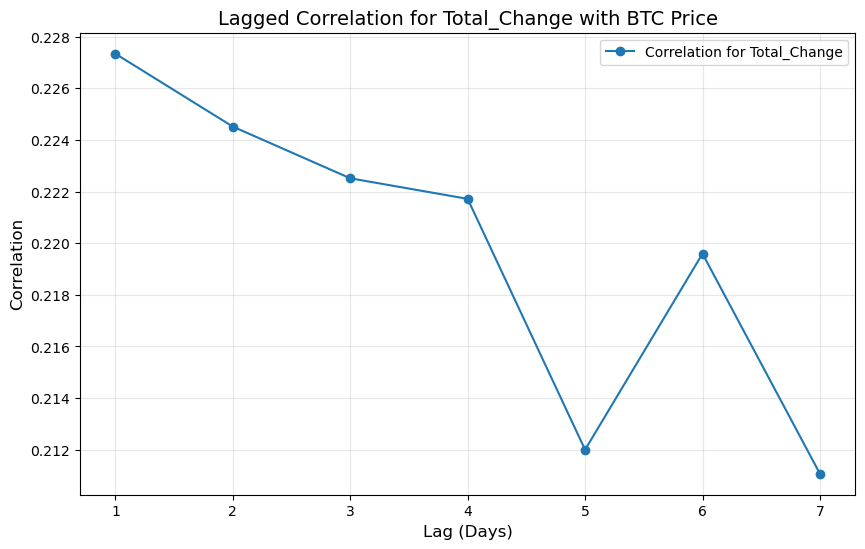

In [84]:
import matplotlib.pyplot as plt

# Example: Line plot for a specific stablecoin factor
factor_to_plot = "Total_Change"  # Replace with the factor of interest
lagged_values = [f"{factor_to_plot}_lag{lag}" for lag in lags]
correlation_values = [lagged_correlations[col] for col in lagged_values if col in lagged_correlations]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lags, correlation_values, marker="o", label=f"Correlation for {factor_to_plot}")
plt.title(f"Lagged Correlation for {factor_to_plot} with BTC Price", fontsize=14)
plt.xlabel("Lag (Days)", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Trading strategy
The data shows that USDT ratio has a positive correlation with BTC price, while USDC ratio has a negative correlation. Based on this relationship, we can formulate a simple trading strategy: buy BTC when USDT ratio rises and USDC ratio falls, and sell BTC when USDC ratio rises and USDT ratio falls.

In [213]:
import numpy as np
import numpy as np

def backtest_strategy(data, threshold):
    """
    回测策略，返回 Sharpe Ratio、最大回撤、总收益及平均持仓周期。
    Parameters:
        data (DataFrame): 包含 BTC 价格和 Ratio 列的数据
        threshold (float): 判定「上升」和「下降」的阈值
    Returns:
        DataFrame: 包含信号的数据
    """
    # 创建数据副本，确保每次调用函数数据独立
    data = data.copy()

    # 计算USDT和USDC的比率变化
    data["USDT_Ratio_Change"] = data["USDT_Ratio"].diff()
    data["USDC_Ratio_Change"] = data["USDC_Ratio"].diff()

    # 定义交易信号：当USDT比率上升且USDC比率下降时买入；当USDC比率上升且USDT比率下降时卖出
    data["Signal"] = 0  # 初始信号为0
    buy_signal = (data["USDT_Ratio_Change"] > threshold) & (data["USDC_Ratio_Change"] < -threshold)
    sell_signal = (data["USDC_Ratio_Change"] > threshold) & (data["USDT_Ratio_Change"] < -threshold)

    # 设置买入和卖出信号
    data.loc[buy_signal, "Signal"] = 1  # 买入信号
    data.loc[sell_signal, "Signal"] = -1  # 卖出信号

    return data



In [232]:
def simulate_trading(data):
    """
    模拟交易并计算策略的每日收益（仅在持仓状态下响应卖出信号）。
    Parameters:
        data (DataFrame): 包含信号和BTC价格的数据
    Returns:
        DataFrame: 更新后的数据，包括策略收益
    """
    data["Strategy_Return"] = 0.0  # 初始化策略收益
    data["BTC_Return"] = data["close"].pct_change()  # 计算BTC日收益

    holding_start = None  # 用于记录持仓开始的索引
    holding = False  # 是否处于持仓状态

    for i in range(1, len(data)):
        if data.loc[i, "Signal"] == 1:  # 买入信号
            if not holding:  # 如果未持仓，则记录持仓开始
                holding_start = i
                holding = True  # 开始持仓

        elif data.loc[i, "Signal"] == -1 and holding:  # 卖出信号
            # 只有在持仓状态下，才响应卖出信号
            data.loc[holding_start:i, "Strategy_Return"] = data.loc[
                holding_start:i, "BTC_Return"
            ].values  # 持仓期内收益
            holding_start = None  # 重置持仓开始
            holding = False  # 结束持仓

    return data


In [233]:
def calculate_metrics(data):
    """
    计算回测指标，包括Sharpe Ratio、最大回撤和总收益。
    Parameters:
        data (DataFrame): 包含策略收益和累计收益的数据
    Returns:
        tuple: Sharpe Ratio, 最大回撤, 总收益
    """
    # 计算累计收益
    data["Cumulative_Strategy"] = (1 + data["Strategy_Return"]).cumprod()
    

    # 计算Sharpe Ratio（假设365个交易日）
    sharpe_ratio = data["Strategy_Return"].mean() / data["Strategy_Return"].std() * np.sqrt(365)

    # 计算最大回撤
    max_drawdown = (data["Cumulative_Strategy"] / data["Cumulative_Strategy"].cummax() - 1).min()

    # 计算策略的总收益
    total_return = (1 + data["Strategy_Return"]).prod() - 1

    return sharpe_ratio, max_drawdown, total_return


In [240]:
def calculate_avg_holding_period(data):
    """
    计算平均持仓周期。
    Parameters:
        data (DataFrame): 包含信号和模拟交易的数据
    Returns:
        float: 平均持仓周期（单位：天）
    """
    holding_periods = []  # 保存所有持仓周期
    holding_start = None  # 持仓开始时间
    holding = False  # 是否处于持仓状态

    for i in range(1, len(data)):
        if data.loc[i, "Signal"] == 1:  # 买入信号
            if not holding:  # 如果未持仓
                holding_start = i  # 记录买入时间
                holding = True  # 开始持仓

        elif data.loc[i, "Signal"] == -1 and holding:  # 卖出信号且已持仓
            holding_periods.append(i - holding_start)  # 计算持仓周期
            holding_start = None  # 重置持仓开始
            holding = False  # 结束持仓

    # 如果最后仍然持仓，计算从买入到数据结束的持仓周期
    if holding and holding_start is not None:
        holding_periods.append(len(data) - holding_start)

    # 返回平均持仓周期
    avg_holding_period = np.mean(holding_periods) if holding_periods else 0
    return avg_holding_period


In [226]:
def backtest(data, threshold):
    """
    综合回测过程，计算回测结果。
    Parameters:
        data (DataFrame): 包含BTC价格和Ratio列的数据
        threshold (float): 判定「上升」和「下降」的阈值
    Returns:
        dict: 包含回测指标和平均持仓周期
    """
    # 第一步：生成交易信号
    data = backtest_strategy(data, threshold)

    # 第二步：模拟交易
    data = simulate_trading(data)

    # 第三步：计算回测指标
    sharpe_ratio, max_drawdown, total_return = calculate_metrics(data)

    # 第四步：计算平均持仓周期
    avg_holding_period = calculate_avg_holding_period(data)

    # 返回回测结果
    return {
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "Total Return": total_return,
        "Avg Holding Period": avg_holding_period
    }


In [227]:
import numpy as np
import pandas as pd

# 假设 btc_data 是你的 BTC 价格和 USDT/USDC 比率数据，已经包含了相应的列

def grid_search_threshold(data, threshold_range):
    """
    执行网格回测，搜索最合适的 threshold。
    Parameters:
        data (DataFrame): 包含BTC价格和比率数据的数据
        threshold_range (list): 可能的阈值范围
    Returns:
        dict: 包含最佳阈值及其回测结果
    """
    results = []  # 用于存储所有阈值的回测结果
    
    # 对于每个阈值执行回测
    for threshold in threshold_range:
        # print(f"正在回测 threshold = {threshold}")
        
        # 执行回测
        backtest_results = backtest(data, threshold)
        
        # 记录结果
        results.append({
            "Threshold": threshold,
            "Sharpe Ratio": backtest_results["Sharpe Ratio"],
            "Max Drawdown": backtest_results["Max Drawdown"],
            "Total Return": backtest_results["Total Return"],
            "Avg Holding Period": backtest_results["Avg Holding Period"]
        })
    
    # 将结果转为 DataFrame
    results_df = pd.DataFrame(results)
    
    # 找到表现最佳的 threshold，这里可以根据Sharpe Ratio或总收益来选择
    best_threshold = results_df.loc[results_df["Sharpe Ratio"].idxmax()]
    
    return results_df, best_threshold



In [241]:
# 设置阈值范围， 範圍，第三個參數為步长
threshold_range = np.arange(0.0001, 0.0133, 0.0001)

# 执行网格回测
results_df, best_threshold = grid_search_threshold(btc_data, threshold_range)



/tmp/ipykernel_112025/3186897089.py:14: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = data["Strategy_Return"].mean() / data["Strategy_Return"].std() * np.sqrt(365)


In [242]:
# 打印所有结果
print("\n所有阈值的回测结果:")
print(results_df)

# 假设 results_df 是存储回测结果的 DataFrame
results_df.to_csv('backtest_results.csv', index=False)

print("回测结果已保存为 'backtest_results.csv'.")
# 打印最佳阈值及其回测结果
print("\n最佳阈值及其回测结果:")
print(best_threshold)


所有阈值的回测结果:
     Threshold  Sharpe Ratio  Max Drawdown  Total Return  Avg Holding Period
0       0.0001      0.545727     -0.717900      0.701572            3.638298
1       0.0002      0.317758     -0.700327      0.164054            4.764706
2       0.0003      0.293607     -0.731828      0.117984            5.451852
3       0.0004      0.330415     -0.694234      0.189824            7.018519
4       0.0005      0.232431     -0.687153      0.011469            8.239130
..         ...           ...           ...           ...                 ...
127     0.0128      0.195351     -0.010794      0.007988            1.000000
128     0.0129      0.195351     -0.010794      0.007988            1.000000
129     0.0130      0.195351     -0.010794      0.007988            1.000000
130     0.0131      0.195351     -0.010794      0.007988            1.000000
131     0.0132           NaN      0.000000      0.000000            0.000000

[132 rows x 5 columns]
回测结果已保存为 'backtest_results.csv'.

最佳阈值及其

In [236]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_strategy_vs_btc(data, threshold):
    """
    绘制策略收益曲线与BTC价格曲线，并标注买卖信号点。
    
    Parameters:
        data (DataFrame): 包含BTC价格和比率数据的数据
        threshold (float): 阈值
    """
    # 运行回测
    # 只关心总收益相关的部分，不关心Sharpe Ratio 和 最大回撤
    _, _, _, _ = backtest(data, threshold)  # 这里可以忽略返回的值

    # 计算BTC价格的日收益率
    data["BTC_Return"] = data["close"].pct_change()

    # 生成交易信号
    data["Signal"] = 0
    buy_signal = (data["USDT_Ratio_Change"] > threshold) & (data["USDC_Ratio_Change"] < -threshold)
    sell_signal = (data["USDC_Ratio_Change"] > threshold) & (data["USDT_Ratio_Change"] < -threshold)

    data.loc[buy_signal, "Signal"] = 1  # 买入信号
    data.loc[sell_signal, "Signal"] = -1  # 卖出信号

    # 持仓逻辑
    holding = False
    for i in range(len(data)):
        if data.loc[i, "Signal"] == 1:  # 买入信号
            holding = True
        elif data.loc[i, "Signal"] == -1 and holding:  # 卖出信号
            holding = False
        
        # 更新策略收益
        if holding:
            data.loc[i, "Strategy_Return"] = data.loc[i, "BTC_Return"]
        else:
            data.loc[i, "Strategy_Return"] = 0
    
    # 计算累计收益
    data["Cumulative_Strategy_Return"] = (1 + data["Strategy_Return"]).cumprod()
    data["Cumulative_BTC_Return"] = (1 + data["BTC_Return"]).cumprod()

    # 绘制图形
    plt.figure(figsize=(14, 7))
    plt.plot(data["Date"], data["Cumulative_Strategy_Return"], label="Strategy Cumulative Return", color="b")
    plt.plot(data["Date"], data["Cumulative_BTC_Return"], label="BTC Cumulative Return", color="r", linestyle="--")

    # 绘制买卖信号点
    plt.scatter(data[data["Signal"] == 1]["Date"], data[data["Signal"] == 1]["Cumulative_Strategy_Return"],
                marker="^", color="g", label="Buy Signal", s=100, zorder=5)
    plt.scatter(data[data["Signal"] == -1]["Date"], data[data["Signal"] == -1]["Cumulative_Strategy_Return"],
                marker="v", color="r", label="Sell Signal", s=100, zorder=5)

    # 设置标题和标签
    plt.title(f"Strategy vs BTC Price (Threshold = {threshold})")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend(loc="best")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


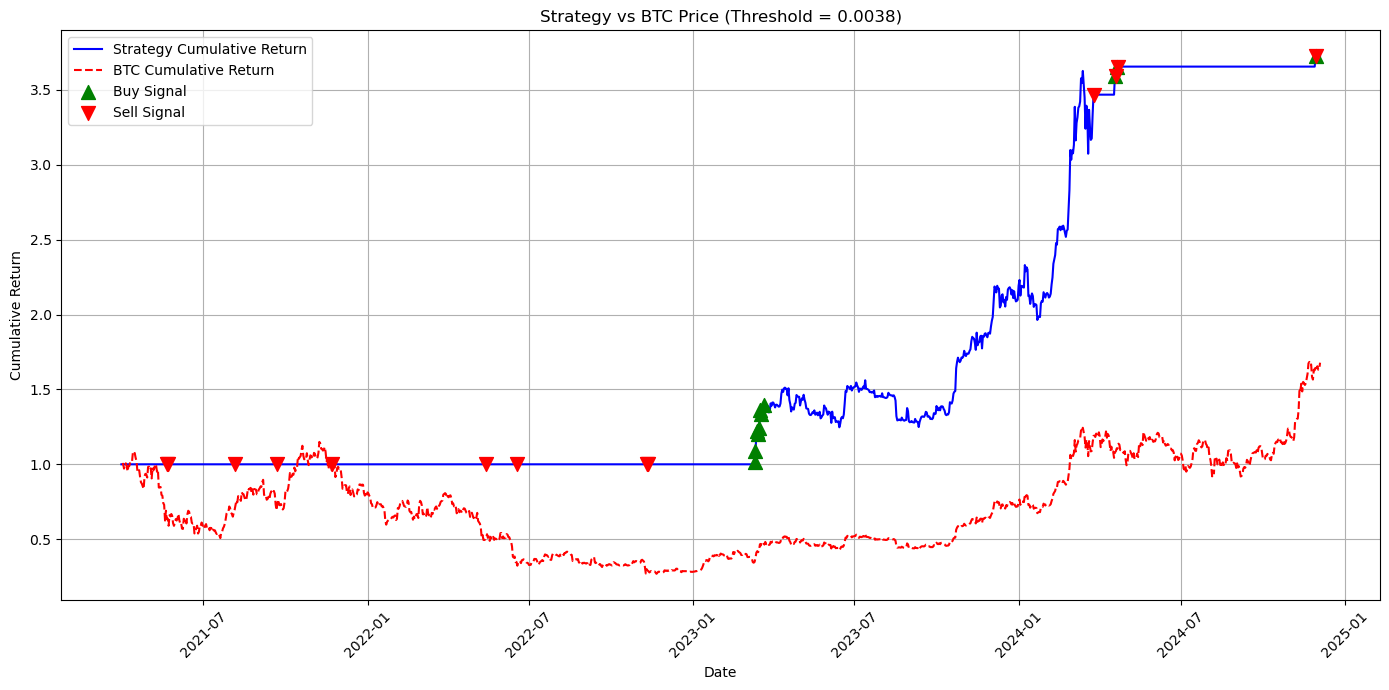

In [244]:
# 示例：绘制阈值为 0.001 时的收益曲线
threshold = 0.0038
plot_strategy_vs_btc(btc_data, threshold)